## 2022 Exam for Part 1 of the course.
## CPMBIO210, IB120, IB201. Introduction to Quantitative Methods in Biology

Import libraries that you'll need in the cell below

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from scipy.integrate import solve_ivp

## Question 1
  
You work as an epidemiological modeler for the CDC.  
  
You learn that World Health Organization (WHO) has reported a new variant of COVID19 called zeta has been detected abroad and it is only a matter of time before this variants makes it to the US.  

You are meeting with your supervisor in the afternoon who wants a preliminary report on the zeta variant.    
While you're setting up a more elaborate model, you decide to get a few quick estimates to report to your supervisor using  SIR model:
  
$N = S + I + R$  
   
$\frac{dS}{dt}=-\gamma \cdot R_0 \cdot \frac{S}{N} \cdot I$  
  
$\frac{dI}{dt}=\gamma \cdot R_0 \cdot \frac{S}{N} \cdot I - \gamma \cdot I$  

$\frac{dR}{dt}=\gamma \cdot I$  
  
You look up in the WHO database that $R_0=8$, $\gamma=0.2$ for the zeta strain of COVID19.  
You know that this database reports $\gamma$ in units $Day^{-1}$ while $R_0$ has no units.  
You also know that about 90% of the US population is vaccinated or had prior infection with COVID19 and you assume that all of these people will be resistant to zeta variant.  
Assume that total US population is 330,000,000.

**Question 1A (10 points).** Your branch of CDC uses a definition of the epidemic as a situation when a number of infected people exceeds 10,000. Using the SIR model and parameters above, figure out if zeta variant will cause an epidemic in the US (i.e., number of infected people will exceed 10,000 at any point). To validate your prediction, plot the number of infected people over time assuming that currently there's 1 person in US that is infected with zeta variant and no other variants are present. Make sure to pick the scale of y axis so that you can actually see 10,000 Infected.

(0.0, 10000.0)

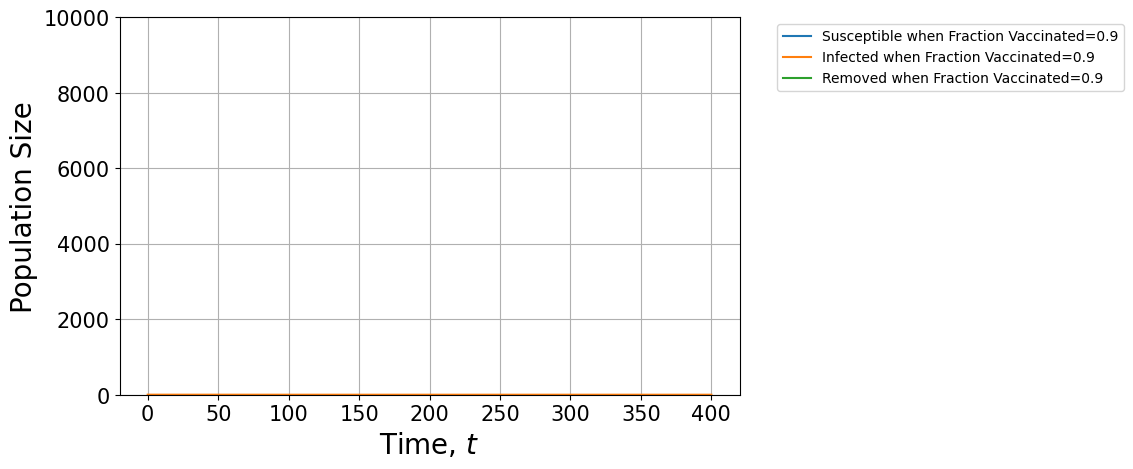

In [3]:
# The answer is NO there will be no epidemic of zeta in US using above parameters for zeta

R0 = 8
γ = 0.2
k = 0.9


def SIR_Model(t, y):
    S, I, R = y
    N = S + I + R
    dSdt = -γ * R0 * (S / N) * I
    dIdt = γ * R0 * (S / N) * I - γ * I
    dRdt = γ * I
    return [dSdt, dIdt, dRdt]


initial_condition = [330e6 - k * 330e6, 1, k * 330e6]
tspan = [0, 400]
soln = solve_ivp(
    SIR_Model, tspan, initial_condition, t_eval=np.linspace(0, tspan[1], 1000)
)

plt.figure(figsize=(8, 5), dpi=100)
plt.plot(soln.t, soln.y[0], label=f"Susceptible when Fraction Vaccinated={k}")
plt.plot(soln.t, soln.y[1], label=f"Infected when Fraction Vaccinated={k}")
plt.plot(soln.t, soln.y[2], label=f"Removed when Fraction Vaccinated={k}")

plt.xlabel("Time, $t$", fontsize=20)
plt.ylabel("Population Size", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(0, 10000)

**Question 1B  (10 points).** You know that different States in US have different fraction of the population that is vaccinated. Based on the parameters of the zeta variant, what fraction of the state population needs to be vaccinated in order to prevent the spread of zeta variant in that state? To simplify you calculations, you assume that States can be treated as completely independent populations and you decide to not account for any interstate travel.

**Answer:  
Recall from lectures that $FractionVaccinated \geq 1 - \frac{1}{R_0}$ is the cutoff for having an epidemic.    
Using $R_0=8$ we get $FractionVaccinated\geq1-1/8=0.875$**

## Question 2.
You want to model the dynamics of expression of Protein called $Protein$ after its induction with hormone called $Hormone$.  

Here is the info that you know about $Protein$ and $Hormone$.
  - In the presence of $Hormone$, the promoter starts producing mRNA called $mRNA$ that codes for $Protein$ at a constant rate $\alpha$
  - In the absence of $Hormone$, the promoter does not produce any $mRNA$
  - $mRNA$ is degraded at a rate $\gamma \cdot mRNA$
  - $Protein$ is translated at a rate $\beta \cdot mRNA$ and is degraded at a rate $\delta \cdot Protein$


**Question 2A (10 points).** Write down differential equations that descibe the dynamics of $Protein$ and $mRNA$ in the presence of $Hormone$ and in the absence of $Hormone$. You'll need to write down a total of four differential equations as shown below.

In the presence of $Hormone$:

$\frac{dmRNA}{dt}=\alpha -  \gamma \cdot mRNA$
  
$\frac{dProtein}{dt}=\beta -  \delta \cdot Protein$

In the absence of $Hormone$:

$\frac{dmRNA}{dt}=-  \gamma \cdot mRNA$  
  
$\frac{dProtein}{dt}=\beta -  \delta \cdot Protein$

**Question 2B (10 points).** Solve the above system of differential equations using your prefered method and plot the changes in levels of $Protein$ and $mRNA$ after addition of $Hormone$ over timeframe 0-100 minutes.  
Use the following values if needed:  
$\alpha = 5$  
$\beta = 2$  
$\gamma = 1$  
$\delta = 0.1$  
$\alpha$ and $\beta$ have units $\frac{\mu M}{min}$ and $\gamma$ and $\delta$ have units $\frac{1}{min}$

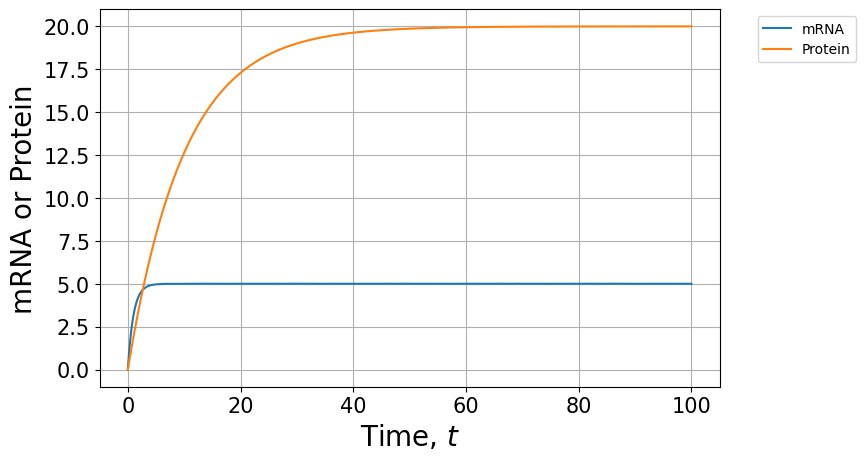

In [4]:
α = 5
β = 2
γ = 1
δ = 0.1


def f(t, y):
    mRNA, Protein = y
    dmRNA_dt = α - γ * mRNA
    dProtein_dt = β - δ * Protein
    return [dmRNA_dt, dProtein_dt]


tspan = [0, 100]
initial_condition = [0, 0]
soln = solve_ivp(f, tspan, initial_condition, t_eval=np.linspace(0, tspan[1], 1000))

plt.figure(figsize=(8, 5), dpi=100)
plt.plot(soln.t, soln.y[0], label=f"mRNA")
plt.plot(soln.t, soln.y[1], label=f"Protein")
plt.xlabel("Time, $t$", fontsize=20)
plt.ylabel("mRNA or Protein", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc="upper left");